In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### As part of the QC program of the assay lab, several duplicates are inserted in the course of the sample preparation and analysis.
#### This project is a study on the duplicate runs of nickel ore pellets as done in our lab.
#### Twin samples(TS),  a duplicate on the very start of the sample reduction process.
#### Course Duplicates (CD) - sample pulverized from the coarse crushed sample,
#### Pulp duplicates (PD) - same pulverizing process, different weighing and pelletizing,
#### Rerun(RR), same pellet, rerun on the same XRF.
### Expected variations would be TS > CD > PD > RR.

In [20]:
dup22 = pd.read_excel('/Users/ecuerbo/Desktop/data/2023 Duplicates Monitoring.xlsx', sheet_name=1)
dup23 = pd.read_excel('/Users/ecuerbo/Desktop/data/2023 Duplicates Monitoring.xlsx', sheet_name=0)

In [21]:
dup22.columns = ['DATE', 'XRF', 'JOB CODE ', 'Kind', 'Ni', 'Fe', 'Alumina']

In [22]:
dup23.head()

,DATE,XRF,JOB CODE,Kind,Ni,Fe,Alumina
0,2023-03-28 03:01:00,4,F23-002,TS,-0.0037,0.17,0.055
1,2023-03-28 03:01:00,4,F23-002,PD,0.0064,-0.33,0.085
2,2023-03-28 03:14:00,3,F23-001,TS,-0.0170,0.09,-0.038
3,2023-03-28 03:14:00,3,F23-001,PD,0.0018,-0.27,0.161
4,2023-03-28 08:34:00,4,F23-004,PD,-0.0198,-0.52,-0.009


In [44]:
ni_ts_pd_22 = dup22.groupby(["XRF","Kind"]).agg(
    mean_Ni=("Ni", "mean"),
    median_Ni=("Ni", "median"),
    std_Ni=("Ni", "std"),
    count_Ni = ("Ni","count")
).round(3).reset_index()

In [45]:
ni_ts_pd_22

,XRF,Kind,mean_Ni,median_Ni,std_Ni,count_Ni
0,2,TS,0.000,0.000,0.022,111
1,3,PD,0.002,-0.003,0.020,17
2,3,TS,-0.001,0.000,0.027,535
3,4,PD,-0.013,-0.008,0.027,37
4,4,TS,-0.002,-0.001,0.066,514


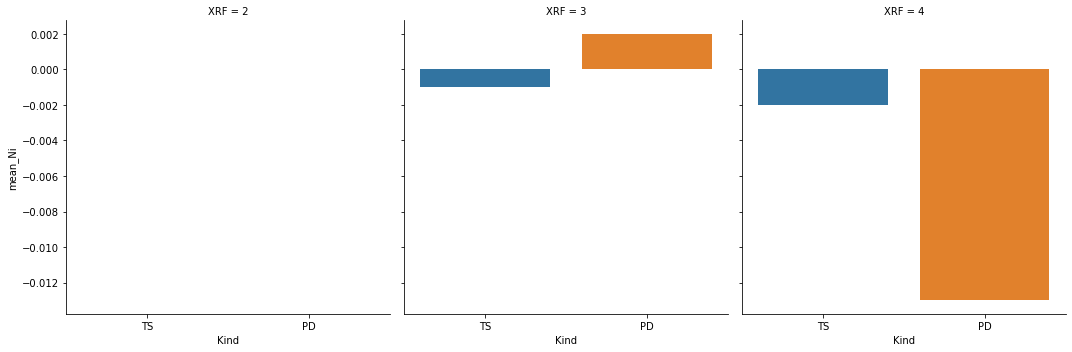

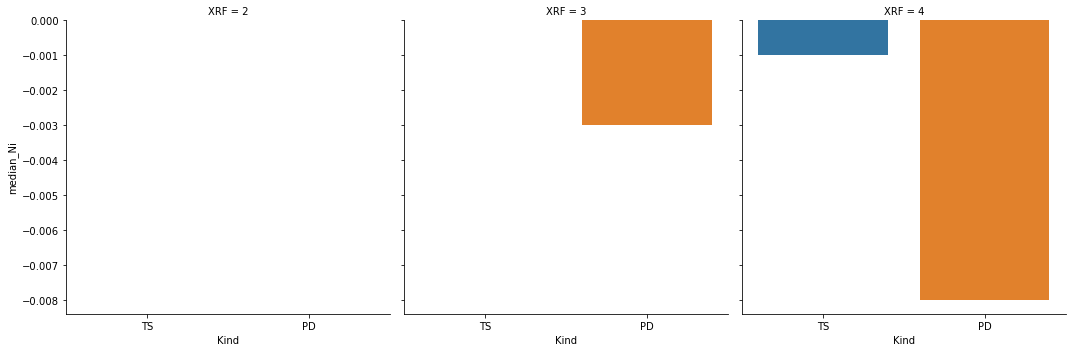

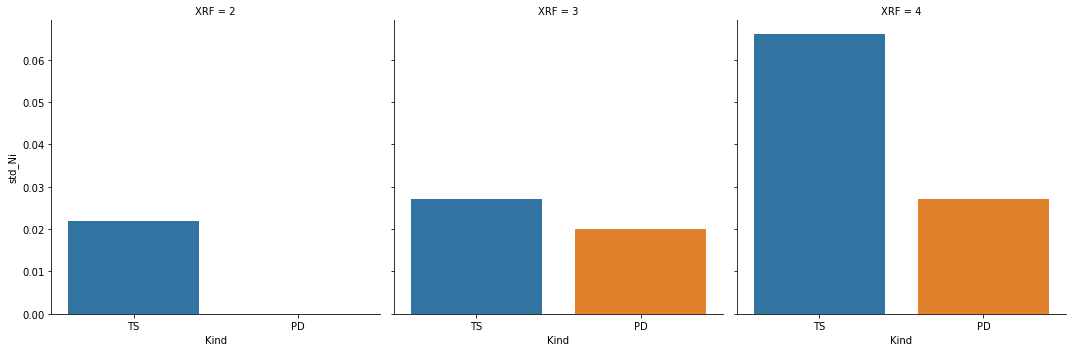

In [46]:
sns.catplot(data=ni_ts_pd_22, x="Kind",y="mean_Ni", kind="bar", col="XRF")
sns.catplot(data=ni_ts_pd_22, x="Kind",y="median_Ni", kind="bar", col="XRF")
sns.catplot(data=ni_ts_pd_22, x="Kind",y="std_Ni", kind="bar", col="XRF");

In [47]:
Fe_ts_pd_22 = dup22.groupby(["XRF","Kind"]).agg(
    mean_Fe=("Fe", "mean"),
    median_Fe=("Fe", "median"),
    std_Fe=("Fe", "std"),
    count_Fe = ("Fe","count")
).round(3).reset_index()

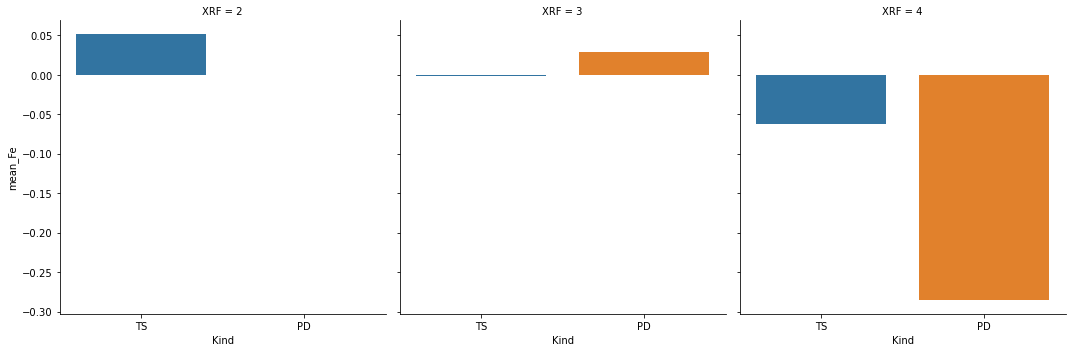

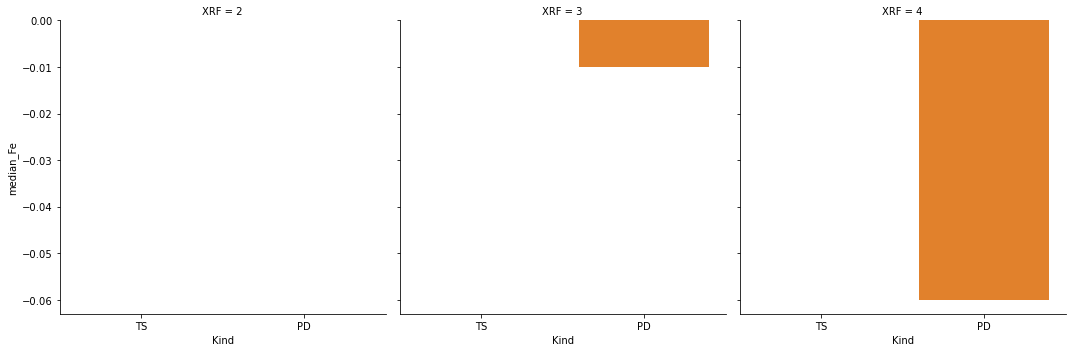

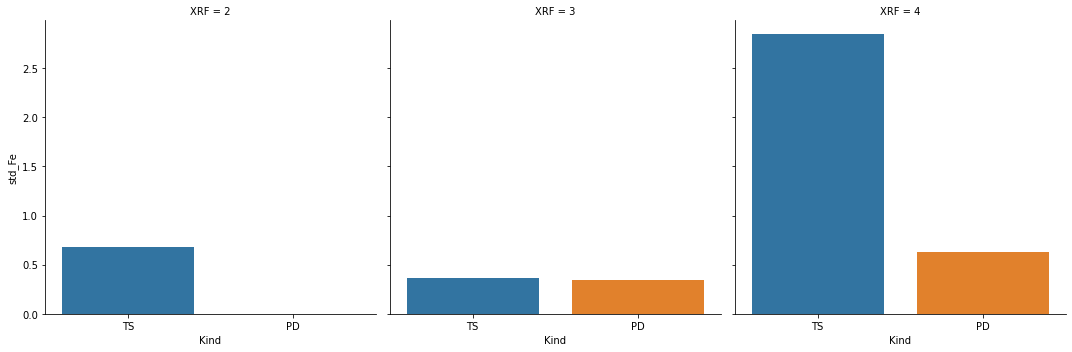

In [48]:
sns.catplot(data=Fe_ts_pd_22, x="Kind",y="mean_Fe", kind="bar", col="XRF")
sns.catplot(data=Fe_ts_pd_22, x="Kind",y="median_Fe", kind="bar", col="XRF")
sns.catplot(data=Fe_ts_pd_22, x="Kind",y="std_Fe", kind="bar", col="XRF");

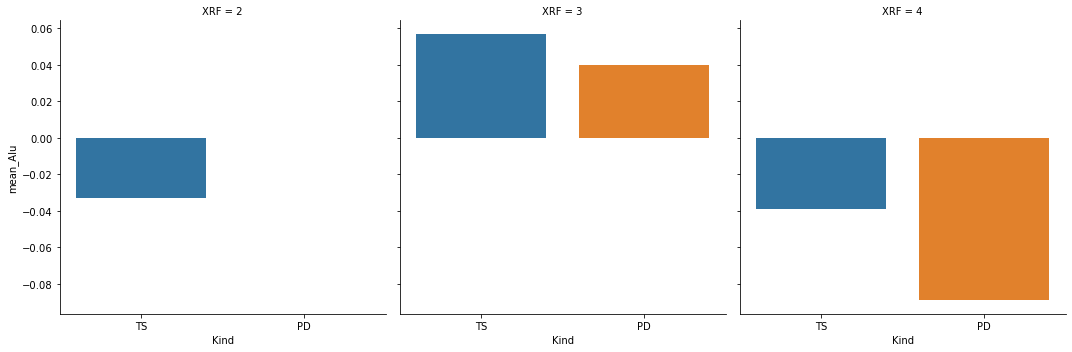

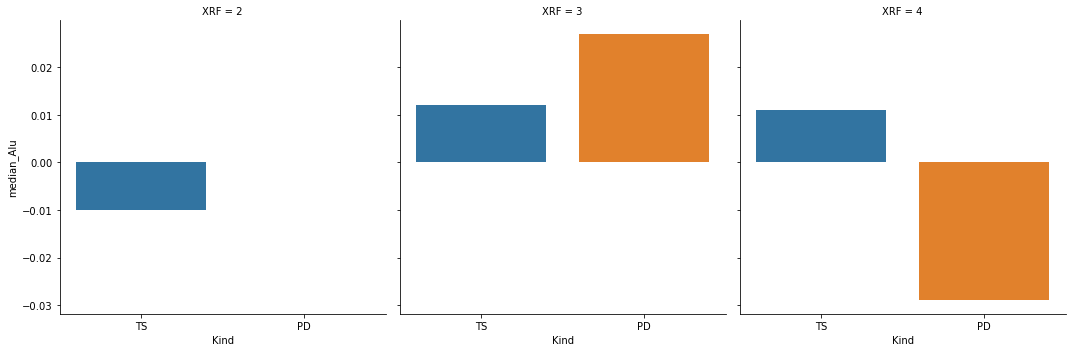

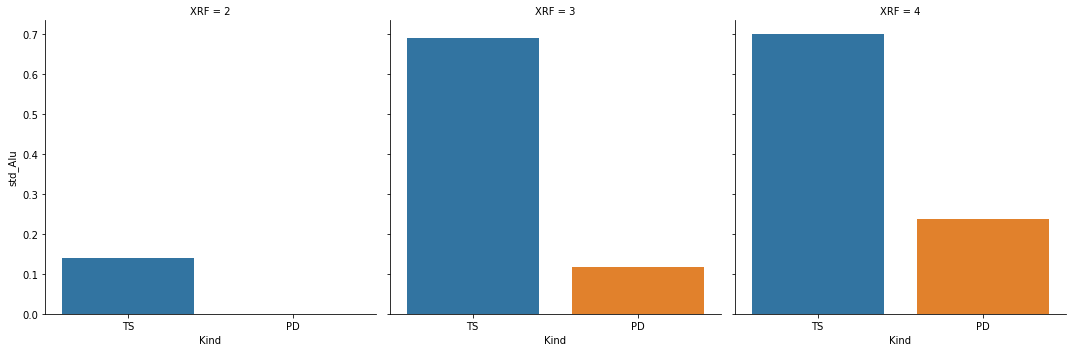

In [50]:
Alu_ts_pd_22 = dup22.groupby(["XRF","Kind"]).agg(
    mean_Alu=("Alumina", "mean"),
    median_Alu=("Alumina", "median"),
    std_Alu=("Alumina", "std"),
    count_Alu = ("Alumina","count")
).round(3).reset_index()

sns.catplot(data=Alu_ts_pd_22, x="Kind",y="mean_Alu", kind="bar", col="XRF")
sns.catplot(data=Alu_ts_pd_22, x="Kind",y="median_Alu", kind="bar", col="XRF")
sns.catplot(data=Alu_ts_pd_22, x="Kind",y="std_Alu", kind="bar", col="XRF");

### Standard Deviation of Element Difference by XRF and by Kind of Duplicate

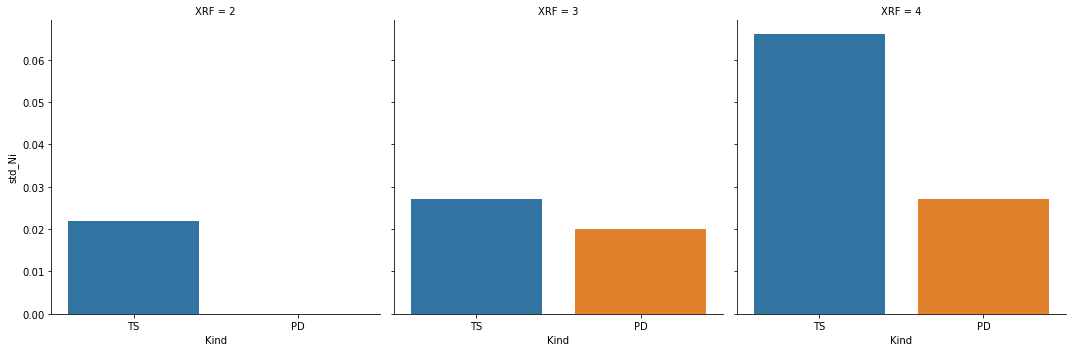

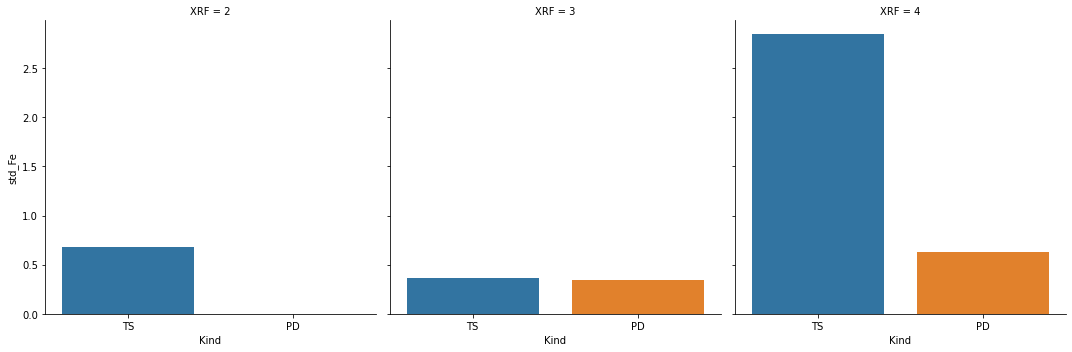

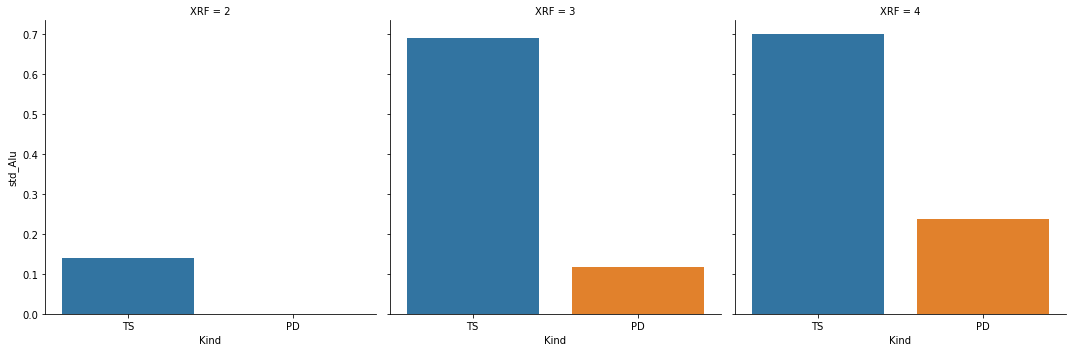

In [51]:
sns.catplot(data=ni_ts_pd_22, x="Kind",y="std_Ni", kind="bar", col="XRF")
sns.catplot(data=Fe_ts_pd_22, x="Kind",y="std_Fe", kind="bar", col="XRF")
sns.catplot(data=Alu_ts_pd_22, x="Kind",y="std_Alu", kind="bar", col="XRF");